In [3]:
import cv2
import matplotlib.pyplot as plt
import dlib
import os
import sys
import glob
import numpy as np
from imutils import face_utils
font = cv2.FONT_HERSHEY_SIMPLEX
import skimage.io as io


In [36]:
def get_Image():
  return "/Applications/Desktop/facesFolder/faces.jpg"

In [37]:
def loading_image(imagedata):
  img = cv2.imread(imagedata, 1)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  plt.figure(figsize=(12,8))
  plt.imshow(gray, cmap='gray')
  
  plt.show()

In [38]:
def loadOpenCvFiles(facePath, eyePath, smilePath):
  faceCascade = cv2.CascadeClassifier(facePath)
  eyeCascade = cv2.CascadeClassifier(eyePath)
  
  smileCascade = cv2.CascadeClassifier(smilePath)



In [39]:
def delete_Files():
  filelist = glob.glob(os.path.join('Extracted/', "*.*"))
  for f in filelist:
      os.remove(f)
  filelist = glob.glob(os.path.join('Detected/', "*.*"))
  for f in filelist:
  
    os.remove(f)

In [40]:
def check_faces(image):
    facePath="/Applications/Desktop/haarcascades/haarcascade_frontalface_alt.xml"
    gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faceCascade = cv2.CascadeClassifier(facePath)
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.25,minNeighbors=1,minSize=(30, 30))
    return(faces)

In [41]:
def face_Extractor(imagePath, haarcascade_FileName):


  if imagePath.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
    image = cv2.imread(imagePath)
    image_Name = os.path.basename(imagePath)


    faces = check_faces(image)


    print('[INFO] Found {0} Faces.\n'.format(len(faces)))


    i=0


    while len(faces)<3 and i<4:
      print('[INFO] Rotating Image 90 Degree')
      image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)            
      faces = check_faces(image)
      i=i+1
      
    faces = check_faces(image)


    print("[INFO] Found {0} Faces.\n".format(len(faces)))


    delete_Files()


    for (x, y, w, h) in faces:        
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      roi_color = image[y:y + h, x:x + w]
      print('[INFO] Object Saved As: '+str(x+w) + str(h) + '_faces.jpg')
      cv2.imwrite('/Applications/Desktop/facesFolder/faces.jpg'+str(x+w) + str(h) + '_faces.jpg', roi_color)
      img = io.imread('/Applications/Desktop/facesFolder/faces.jpg'+str(x+w) + str(h) + '_faces.jpg')
      plt.imshow(img)
      plt.show()


    status = cv2.imwrite('/Applications/Desktop/facesFolder/faces.jpg'+image_Name, image)
    img = io.imread('/Applications/Desktop/facesFolder/faces.jpg'+image_Name)
    plt.imshow(img)
    plt.show()

In [42]:
def detect_face_with_Image_Show(image, scale, minNeighbor, flg, haarCascadePath):
  img = cv2.imread(image, 1)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faceCascade = cv2.CascadeClassifier(haarCascadePath)
  faces = faceCascade.detectMultiScale(img, scaleFactor=scale, minNeighbors=minNeighbor, flags=flg)


  # For each face: TODO: I will try to use Video recorder to capture real data:himanshu
  for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3)


  plt.figure(figsize=(15,8))
  plt.imshow(img, cmap='gray')

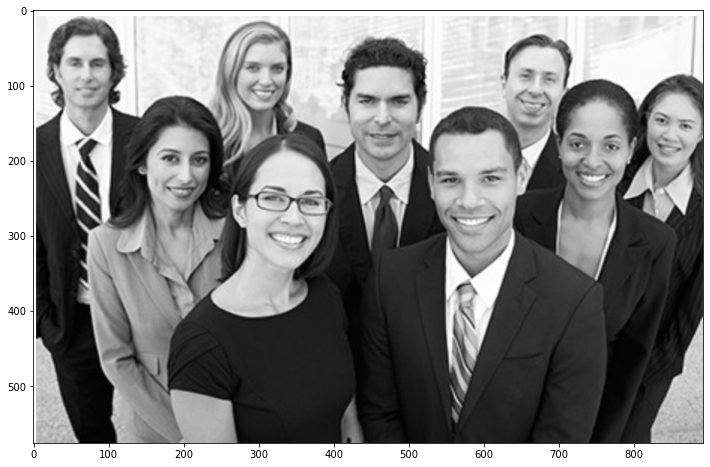

In [43]:
# Load the image
path = "/Applications/Desktop/facesFolder/faces.jpg"
loading_image(path)
  

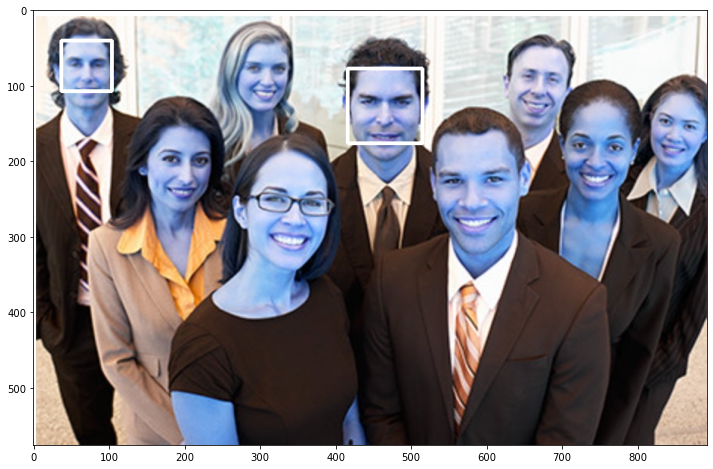

In [44]:
cascPath="/Applications/Desktop/haarcascades/haarcascade_frontalcatface.xml"
imagedata=get_Image()
# img = cv2.imread(imagedata, 1)
# gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
detect_face_with_Image_Show(image=imagedata, scale=1.1, minNeighbor=5, flg=cv2.CASCADE_SCALE_IMAGE, haarCascadePath=cascPath)
  

[INFO] Found 9 Faces.

[INFO] Found 9 Faces.

[INFO] Object Saved As: 11587_faces.jpg


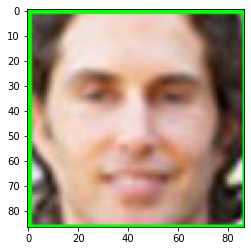

[INFO] Object Saved As: 34979_faces.jpg


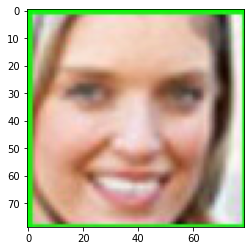

[INFO] Object Saved As: 71792_faces.jpg


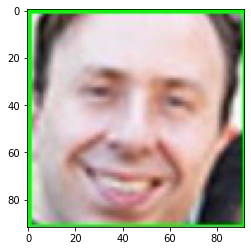

[INFO] Object Saved As: 526118_faces.jpg


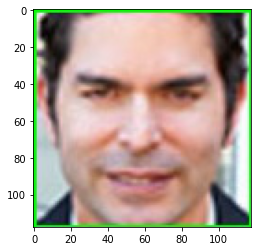

[INFO] Object Saved As: 88976_faces.jpg


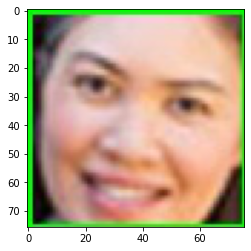

[INFO] Object Saved As: 805115_faces.jpg


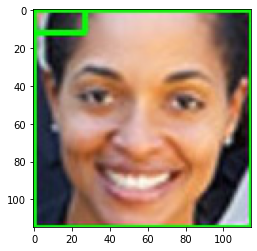

[INFO] Object Saved As: 651137_faces.jpg


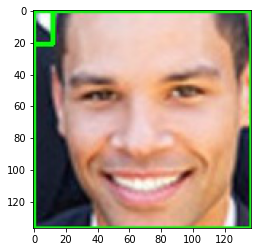

[INFO] Object Saved As: 409130_faces.jpg


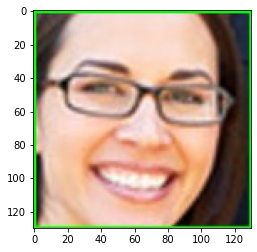

[INFO] Object Saved As: 253104_faces.jpg


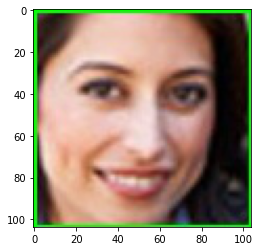

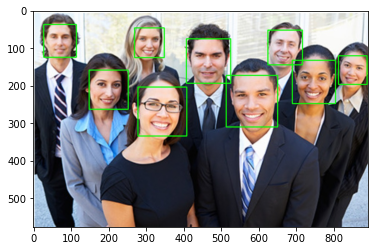

In [45]:
imagePath = get_Image()
haarcascade_FileName = '/Applications/Desktop/haarcascades/haarcascade_frontalcatface.xml'
face_Extractor(imagePath, haarcascade_FileName)
  

In [46]:
def check_faces(image):
  facePath="/content/gdrive/My Drive/AIML/ImageDetection/haarcascade_frontalface_default.xml"
  gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faceCascade = cv2.CascadeClassifier(facePath)
  faces = faceCascade.detectMultiScale(
      gray,
      scaleFactor=1.25,
      minNeighbors=1,
      minSize=(30, 30)
  )
  